In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

importing the tumor data which has the separator of ,

In [3]:
df = pd.read_csv("csv_result-primary-tumor.csv", sep=',')
df

,id,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
0,1,>=60,female,?,?,no,no,no,no,no,yes,no,no,no,no,no,no,no,P
1,2,>=60,male,?,poorly,no,no,no,no,no,yes,no,no,no,yes,no,yes,no,P
2,3,30-59,female,adeno,?,no,no,no,yes,no,no,no,yes,no,no,yes,no,no,N
3,4,30-59,female,adeno,?,no,no,no,no,yes,no,no,no,no,no,no,no,no,N
4,5,30-59,female,adeno,?,no,no,no,yes,yes,no,no,no,no,no,no,no,no,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,335,30-59,female,adeno,well,no,no,no,no,yes,no,no,no,no,no,no,no,no,N
335,336,30-59,male,epidermoid,poorly,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,P
336,337,30-59,female,adeno,well,no,no,no,yes,yes,no,no,no,no,no,no,no,no,N
337,338,30-59,female,adeno,?,yes,no,yes,yes,yes,yes,yes,no,no,no,no,no,yes,N


In [4]:
# to change the float to two decimal places following code is used
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df

,id,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
0,1,>=60,female,?,?,no,no,no,no,no,yes,no,no,no,no,no,no,no,P
1,2,>=60,male,?,poorly,no,no,no,no,no,yes,no,no,no,yes,no,yes,no,P
2,3,30-59,female,adeno,?,no,no,no,yes,no,no,no,yes,no,no,yes,no,no,N
3,4,30-59,female,adeno,?,no,no,no,no,yes,no,no,no,no,no,no,no,no,N
4,5,30-59,female,adeno,?,no,no,no,yes,yes,no,no,no,no,no,no,no,no,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,335,30-59,female,adeno,well,no,no,no,no,yes,no,no,no,no,no,no,no,no,N
335,336,30-59,male,epidermoid,poorly,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,P
336,337,30-59,female,adeno,well,no,no,no,yes,yes,no,no,no,no,no,no,no,no,N
337,338,30-59,female,adeno,?,yes,no,yes,yes,yes,yes,yes,no,no,no,no,no,yes,N


In [5]:
# prints the high level information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               339 non-null    int64 
 1   age              339 non-null    object
 2   sex              339 non-null    object
 3   histologic-type  339 non-null    object
 4   degree-of-diffe  339 non-null    object
 5   bone             339 non-null    object
 6   bone-marrow      339 non-null    object
 7   lung             339 non-null    object
 8   pleura           339 non-null    object
 9   peritoneum       339 non-null    object
 10  liver            339 non-null    object
 11  brain            339 non-null    object
 12  skin             339 non-null    object
 13  neck             339 non-null    object
 14  supraclavicular  339 non-null    object
 15  axillar          339 non-null    object
 16  mediastinum      339 non-null    object
 17  abdominal        339 non-null    ob

In [6]:
# to check the total missing data on each features
# zero indicates there is no missing data values
df.isnull().sum()

id                 0
age                0
sex                0
histologic-type    0
degree-of-diffe    0
bone               0
bone-marrow        0
lung               0
pleura             0
peritoneum         0
liver              0
brain              0
skin               0
neck               0
supraclavicular    0
axillar            0
mediastinum        0
abdominal          0
binaryClass        0
dtype: int64

Replacing ? sign with nan which would be recognized by isnull function

In [7]:
for col in df.select_dtypes(include=[object]):
    df[col] = df[col].replace('?', np.nan)
df.isnull().sum()

id                   0
age                  0
sex                  1
histologic-type     67
degree-of-diffe    155
bone                 0
bone-marrow          0
lung                 0
pleura               0
peritoneum           0
liver                0
brain                0
skin                 1
neck                 0
supraclavicular      0
axillar              1
mediastinum          0
abdominal            0
binaryClass          0
dtype: int64

<Axes: >

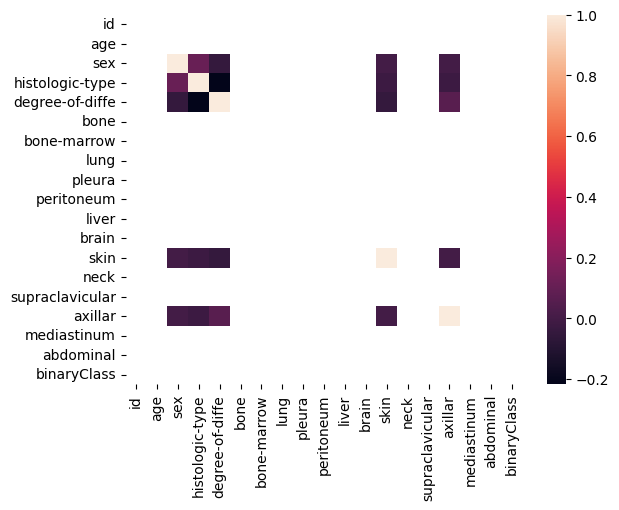

In [8]:
# show a nullity correlation heatmap
sns.heatmap(df.isna().corr())

In [9]:
df = df.dropna()
#df.corr()
len(df)

132

KeyError: 0

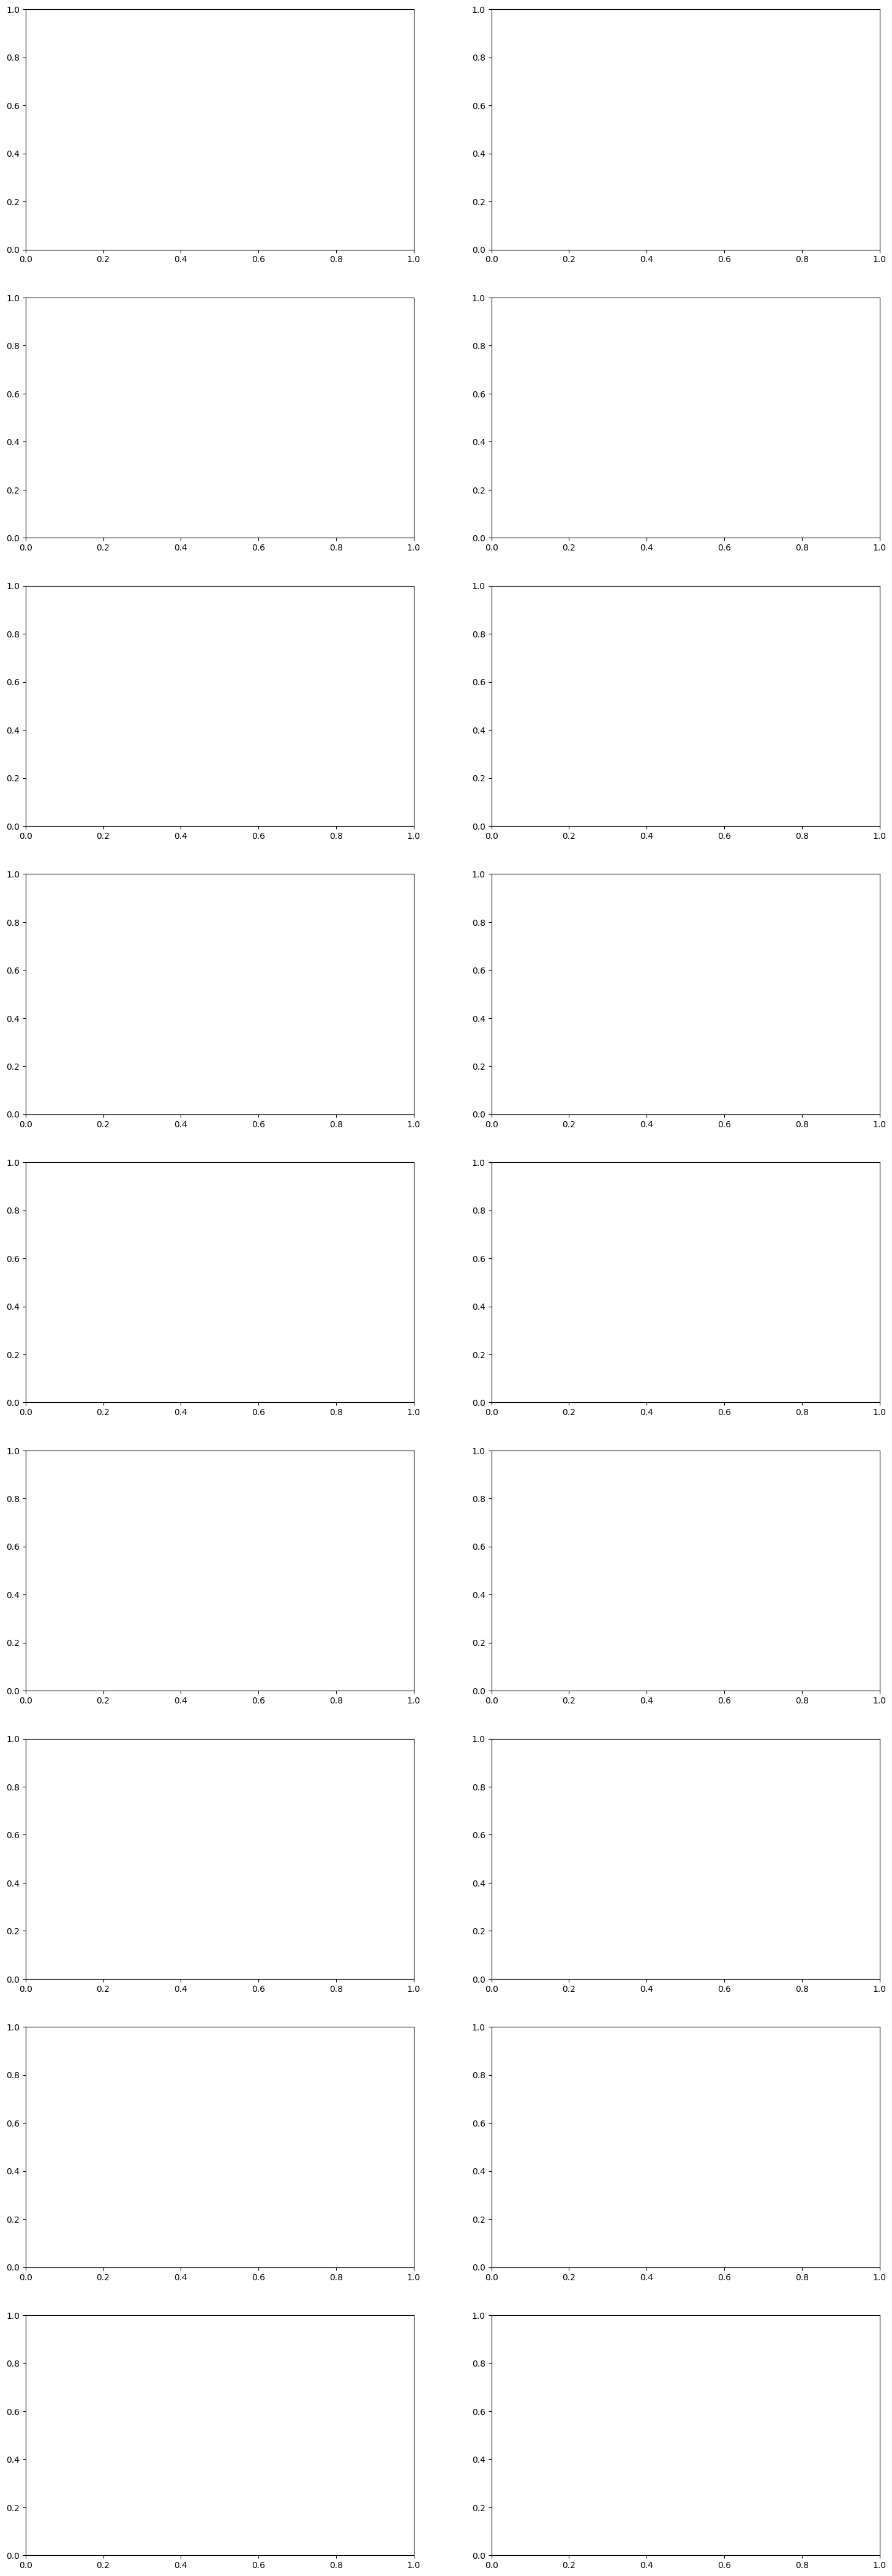

In [36]:
# for col in df.columns: 
#     plt.figure(figsize=(12, 8))  
#     df[col].value_counts().plot(kind='bar') 
#     plt.title(col) 
#     plt.xlabel('Categories') 
#     plt.ylabel('Frequency') 
#     # plt.suptitle('Frequency of Each Category for All Columns', fontsize=16) 
#     # plt.tight_layout() 
#     plt.show()

# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, len(df.columns), figsize=(18, 6))

# for i, col in enumerate(df.columns):
#     df[col].value_counts().plot(kind='bar', ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xlabel('Categories')
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i, col in enumerate(df.columns):
    # Plot on the first subplot (axes[0])
    if i == 1:
        df[col].value_counts().plot(kind='bar', ax=axes[0])
        axes[0].set_title('frequency plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
    # Plot on the second subplot (axes[1])
    elif i == 2:
        df[col].value_counts().plot(kind='bar', ax=axes[1])
        axes[1].set_title('frequency plot')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

